In [1]:
#!nvidia-smi

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

# Loading Libraries

In [2]:
#data management tools
import pandas as pd
import numpy as np
import imblearn

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.over_sampling import ADASYN

import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sb
import re
import datetime

# #Vectorization and Tokenizing
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.preprocessing import MaxAbsScaler

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer


# #DNN Modules
# import torch
# import tensorflow as tf
# from tensorflow.keras import layers
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow.keras.layers import InputLayer
# from tensorflow.keras import losses
# from tensorflow.keras.regularizers import L2
# from tensorflow.keras.utils import plot_model
# from tensorflow.keras.layers import TextVectorization


# #Models
# from sklearn.ensemble import AdaBoostClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# from sklearn.naive_bayes import GaussianNB
# from sklearn.linear_model import LinearRegression


# #Metrics and Testing
from sklearn.model_selection import train_test_split
from sklearn import metrics
# from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Dataloading and Preprocessing

In [2]:
#My Lenovo
#df1 = pd.read_csv('/Data/CERT/r4.2/logon.csv')
#df2 = pd.read_csv('/Data/CERT/r4.2/device.csv')
#df3 = pd.read_csv('/Data/CERT/r4.2/email.csv')
#df4 = pd.read_csv('/Data/CERT/r4.2/file.csv')
#df5 = pd.read_csv('/Data/CERT/r4.2/http.csv')
#df6 = pd.read_csv('/Data/CERT/r4.2/psychometric.csv')

#My MacBook
df1 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/logon.csv')
df2 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/device.csv')
df3 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/email.csv')
df4 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/file.csv')
df5 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/http.csv')
ans = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/answers/answers.csv')
#df6 = pd.read_csv('/Users/ken.clements/code/praxis/CERT42/psychometric.csv')

#Google Drive - Colab
# df1 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/logon.csv')
# df2 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/device.csv')
# df3 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/http.csv')
# df4 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/email.csv')
# df5 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/file.csv')
# df6 = pd.read_csv('/content/drive/MyDrive/Praxis/data/CERT42/psychometric.csv')

In [3]:
START = datetime.date(2010,1,1)
END = datetime.date(2010, 3, 31)

In [4]:
df1['date'] = pd.to_datetime(df1['date'])
df2['date'] = pd.to_datetime(df2['date'])
df3['date'] = pd.to_datetime(df3['date'])
df4['date'] = pd.to_datetime(df4['date'])
df5['date'] = pd.to_datetime(df5['date'])

df1['day_date'] = pd.to_datetime(df1['date']).dt.date
df2['day_date'] = pd.to_datetime(df2['date']).dt.date
df3['day_date'] = pd.to_datetime(df3['date']).dt.date
df4['day_date'] = pd.to_datetime(df4['date']).dt.date
df5['day_date'] = pd.to_datetime(df5['date']).dt.date

In [5]:
df3['activity'] = "email"
df4['activity'] = "file"
df5['activity'] = "http"

In [6]:
df1_bs = df1[((df1['day_date'] >= START) & (df1['day_date'] <= END))]
df2_bs = df2[((df2['day_date'] >= START) & (df2['day_date'] <= END))]
df3_bs = df3[((df3['day_date'] >= START) & (df3['day_date'] <= END))]
df4_bs = df4[((df4['day_date'] >= START) & (df4['day_date'] <= END))]
df5_bs = df5[((df5['day_date'] >= START) & (df5['day_date'] <= END))]

# Stemming Lemmatizing Stopwords Lowercase and Tokenized

In [7]:
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
def prepare_text(pretext):

    # tokenize mission.
    tokens = word_tokenize(pretext, language="english", preserve_line=True)

    # Parts of speech (POS) tag tokens.
    token_tag = pos_tag(tokens)
    
    # Only include some of the POS tags.
    include_tags = ['VBN', 'VBD', 'JJ', 'JJS', 'JJR', 'CD', 'NN', 'NNS', 'NNP', 'NNPS']
    filtered_tokens = (tok for tok, tag in token_tag if tag in include_tags)    
    
    #stem words.
    stemmed_tokens = (lancaster.stem(tok) for tok in filtered_tokens)

    #lemm words.
    lemmed_words = (lemmatizer.lemmatize(tok) for tok in stemmed_tokens)

    lower_words = [str.lower(tok) for tok in lemmed_words]

    #x = cv.fit_transform(tokens).toarray()

    joined = " ".join(lower_words)

    return(joined)

#ps = PorterStemmer()
lancaster = LancasterStemmer()
lemmatizer = nltk.stem.WordNetLemmatizer()

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [8]:
df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
df5_bs['df5tokenized'] = df5_bs['content'].apply(prepare_text)

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_24332/614576161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tokenized'] = df3_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_24332/614576161.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tokenized'] = df4_bs['content'].apply(prepare_text)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_24332/614576161.py:3: SettingWithCopyWarning: 
A value is trying to be se

# TFIDF

In [9]:
nltk.download('stopwords')
stops = set(stopwords.words('english'))
tfidfvectorizer = TfidfVectorizer(stop_words='english', analyzer='word' )

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ken.clements/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
tfidf_df3 = tfidfvectorizer.fit_transform(df3_bs['df3tokenized'])
df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()
df3_bs['df3tfidf_max'] = tfidf_df3.max()



/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_24332/380038886.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tfidf_mean'] = ((tfidf_df3.sum(axis=1).transpose()) / (tfidf_df3.getnnz(axis=1))).transpose()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_24332/380038886.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['df3tfidf_max'] = tfidf_df3.max()


In [11]:
tfidf_df4 = tfidfvectorizer.fit_transform(df4_bs['df4tokenized'])
df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()
df4_bs['df4tfidf_max'] = tfidf_df4.max()


/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_24332/2453036207.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tfidf_mean'] = ((tfidf_df4.sum(axis=1).transpose()) / (tfidf_df4.getnnz(axis=1))).transpose()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_24332/2453036207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['df4tfidf_max'] = tfidf_df4.max()


In [12]:
tfidf_df5 = tfidfvectorizer.fit_transform(df5_bs['df5tokenized'])
df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
df5_bs['df5tfidf_max'] = tfidf_df5.max()


/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_24332/746589437.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_bs['df5tfidf_mean'] = ((tfidf_df5.sum(axis=1).transpose()) / (tfidf_df5.getnnz(axis=1))).transpose()
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_24332/746589437.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_bs['df5tfidf_max'] = tfidf_df5.max()


Aggregate all data

In [13]:
df_merged = pd.concat([df1_bs, df2_bs, df3_bs, df4_bs, df5_bs])

In [14]:
df_merged['label'] = 'normal'

In [15]:
df_merged.loc[df_merged['id'].isin(ans['id']),['label']] = 'bad'

In [16]:
dates = df_merged['day_date']
dates = dates.unique()

In [17]:
dfwow = []
for d in dates:
    dayevents = df_merged.loc[(df_merged['day_date'] == d)]
    users = dayevents['user']
    users = users.unique()
    for u in users:
        userd = dayevents[(dayevents['user'] == u)]
        date = d
        username = u
        login_count = userd[userd['activity'] == 'Logon'].shape[0]
        logout_count = userd[userd['activity'] == 'Logoff'].shape[0]
        email_count = userd[userd['to'].notnull()].shape[0]
        file_count = userd[userd['filename'].notnull()].shape[0]
        http_count = userd[userd['url'].notnull()].shape[0]
        start_time = userd['date'].iloc[0]
        end_time = userd['date'].iloc[-1]
        tfidf3_mean = userd['df3tfidf_mean'].mean()
        tfidf4_mean = userd['df4tfidf_mean'].mean()
        tfidf5_mean = userd['df5tfidf_mean'].mean()
        tfidf3_max = userd['df3tfidf_mean'].max()
        tfidf4_max = userd['df4tfidf_mean'].max()
        tfidf5_max = userd['df5tfidf_mean'].max()
  
        if (userd[(userd['label'] == 'bad')].shape[0] > 0): label = 1
        else: label = 0
        dfwow.append([date, username, login_count, logout_count, email_count, file_count, http_count, start_time, end_time, tfidf3_mean, tfidf4_mean, tfidf5_mean, tfidf3_max, tfidf4_max, tfidf5_max, label])


In [18]:
final = pd.DataFrame(dfwow, columns=['date', 'username', 'login_count', 'logout_count', 'email_count', 'file_count', 'http_count', 'start_time', 'end_time', 'tfidf3_mean', 'tfidf4_mean', 'tfidf5_mean','tfidf3_max', 'tfidf4_max', 'tfidf5_max', 'label'])


<Axes: xlabel='label', ylabel='count'>

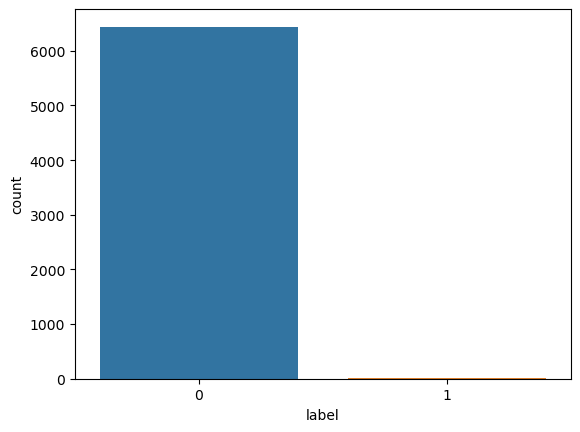

In [19]:
sb.countplot(data=final, x='label')

In [20]:
X = final.loc[:, final.columns != 'label']

In [21]:
y = final['label']

In [22]:
final_undersample = RandomUnderSampler(sampling_strategy=0.5)
X_final_under, y_final_under = final_undersample.fit_resample(X, y)

In [23]:
final_under = X_final_under

In [24]:
final_under['label'] = y

<Axes: xlabel='label', ylabel='tfidf3_mean'>

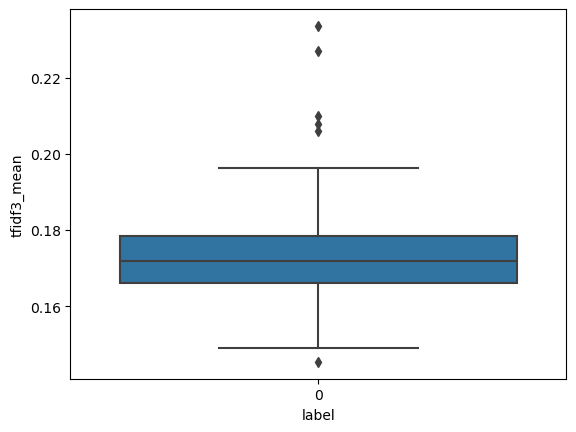

In [25]:
sb.boxplot(data=final_under, x="label", y='tfidf3_mean')

<Axes: xlabel='label', ylabel='tfidf3_max'>

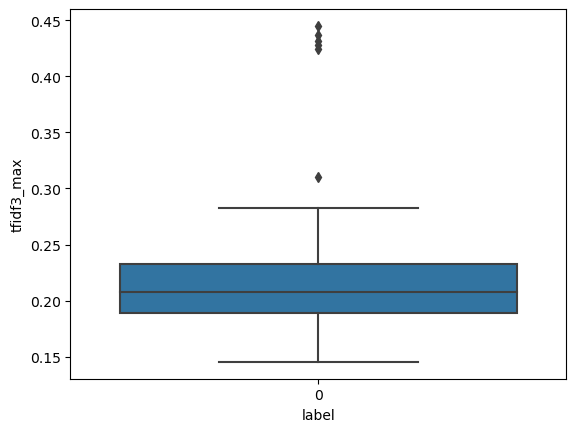

In [26]:
sb.boxplot(data=final_under, x="label", y='tfidf3_max')

<Axes: xlabel='label', ylabel='tfidf4_mean'>

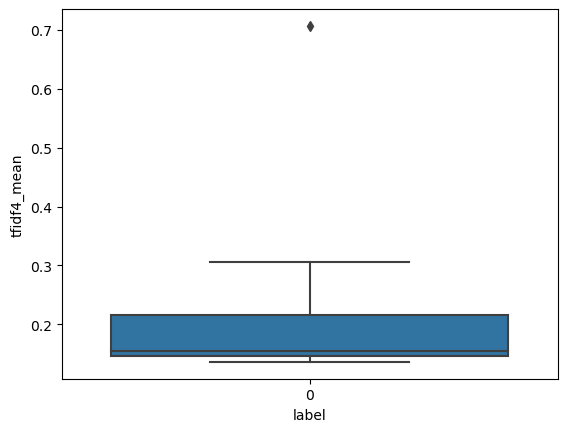

In [27]:
sb.boxplot(data=final_under, x="label", y='tfidf4_mean')

<Axes: xlabel='label', ylabel='tfidf4_max'>

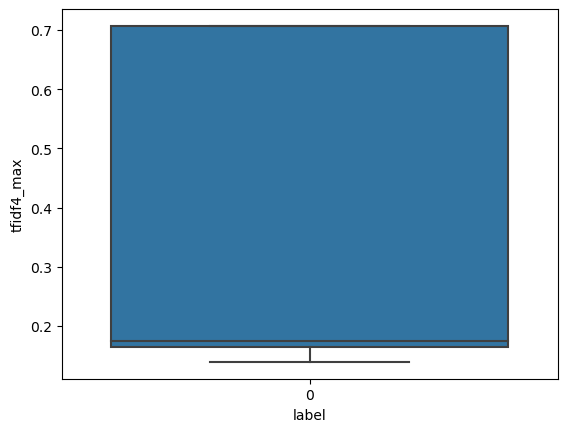

In [28]:
sb.boxplot(data=X_final_under, x="label", y='tfidf4_max')

<Axes: xlabel='label', ylabel='tfidf5_mean'>

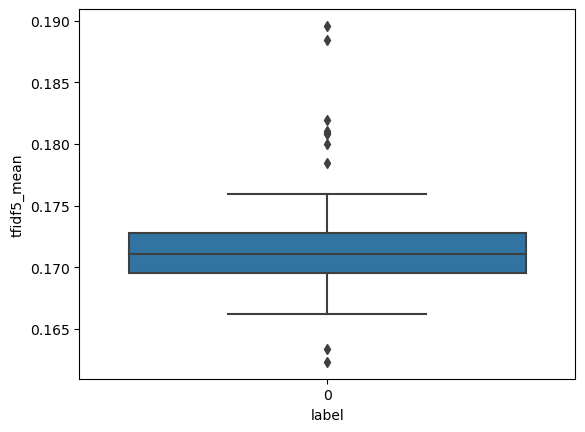

In [29]:
sb.boxplot(data=final_under, x="label", y='tfidf5_mean')

<Axes: xlabel='label', ylabel='tfidf5_max'>

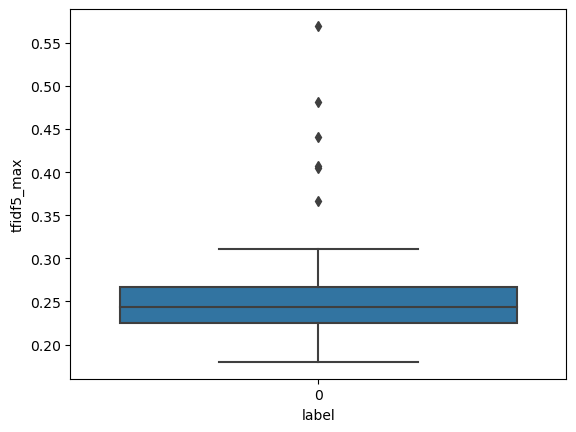

In [30]:
sb.boxplot(data=final_under, x="label", y='tfidf5_max')

<Axes: xlabel='label', ylabel='tfidf3_mean'>

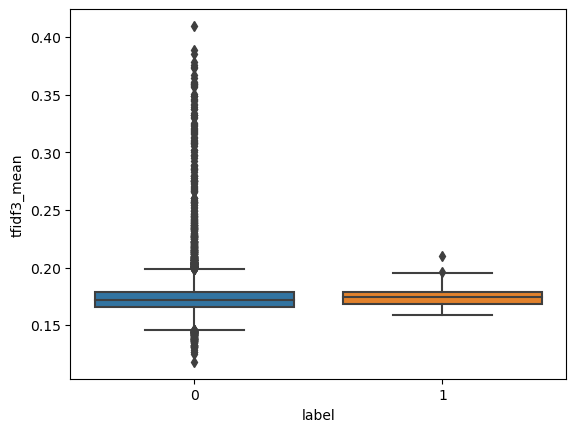

In [31]:
sb.boxplot(data=final, x="label", y='tfidf3_mean')

<Axes: xlabel='label', ylabel='tfidf3_max'>

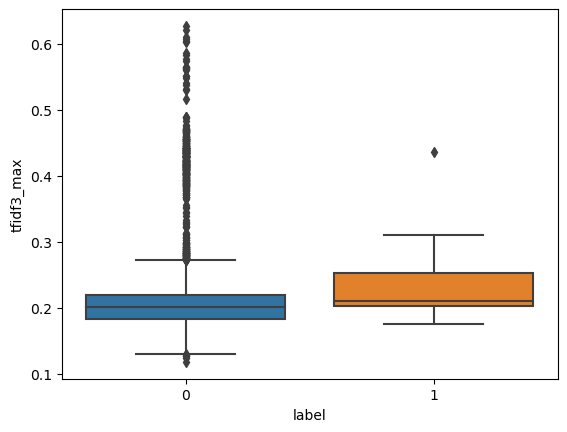

In [32]:
sb.boxplot(data=final, x="label", y='tfidf3_max')

<Axes: xlabel='label', ylabel='tfidf4_mean'>

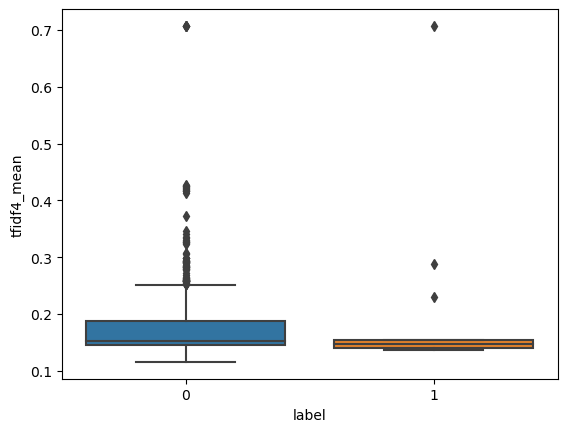

In [33]:
sb.boxplot(data=final, x="label", y='tfidf4_mean')

<Axes: xlabel='label', ylabel='tfidf4_max'>

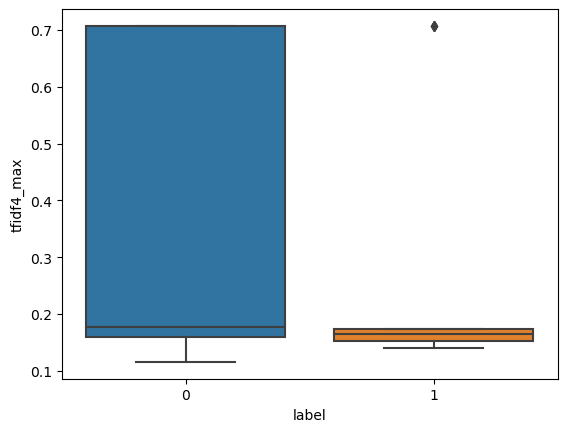

In [34]:
sb.boxplot(data=final, x="label", y='tfidf4_max')

<Axes: xlabel='label', ylabel='tfidf5_mean'>

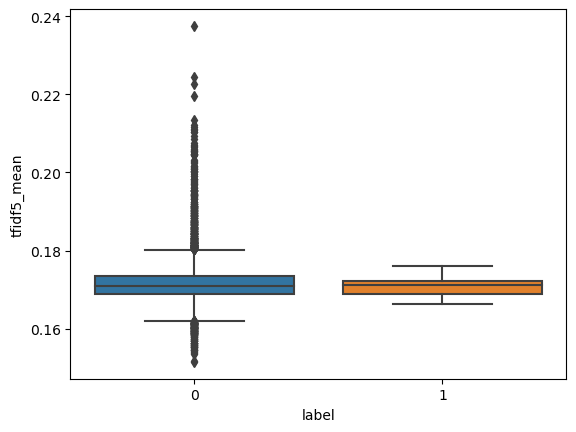

In [35]:
sb.boxplot(data=final, x="label", y='tfidf5_mean')

<Axes: xlabel='label', ylabel='tfidf5_max'>

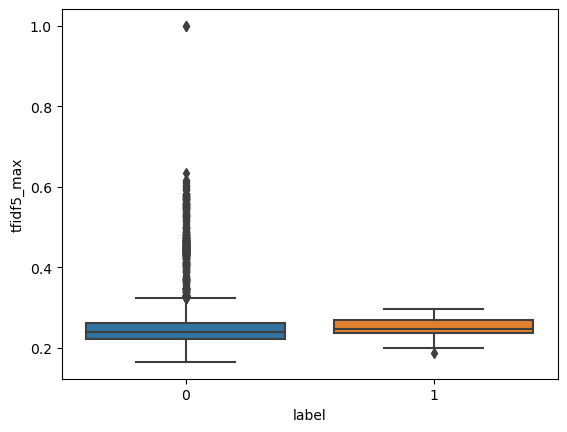

In [36]:
sb.boxplot(data=final, x="label", y='tfidf5_max')

In [128]:
temp3 = final.dropna(subset=['tfidf3_mean'])
temp4 = final.dropna(subset=['tfidf4_mean'])
temp5 = final.dropna(subset=['tfidf5_mean'])

temp3_mean0 = temp3[temp3['label'] == 0].sample(20)
temp3_mean1 = temp3[temp3['label'] == 1].sample(10)
temp4_mean0 = temp4[temp4['label'] == 0].sample(20)
temp4_mean1 = temp4[temp4['label'] == 1].sample(10)
temp5_mean0 = temp5[temp5['label'] == 0].sample(20)
temp5_mean1 = temp5[temp5['label'] == 1].sample(20)

In [129]:
fvalue, pvalue = stats.ttest_ind(temp3_mean0['tfidf3_mean'], temp3_mean1['tfidf3_mean'])
print(fvalue, pvalue)
fvalue, pvalue = stats.ttest_ind(temp4_mean0['tfidf4_mean'], temp4_mean1['tfidf4_mean'])
print(fvalue, pvalue)
fvalue, pvalue = stats.ttest_ind(temp5_mean0['tfidf5_mean'], temp5_mean1['tfidf5_mean'])
print(fvalue, pvalue)

0.09040879632377 0.9286060228128636
-0.11242897895468623 0.9112854474024947
-0.2914750123815637 0.7722732784672138


<Axes: xlabel='date', ylabel='email_count'>

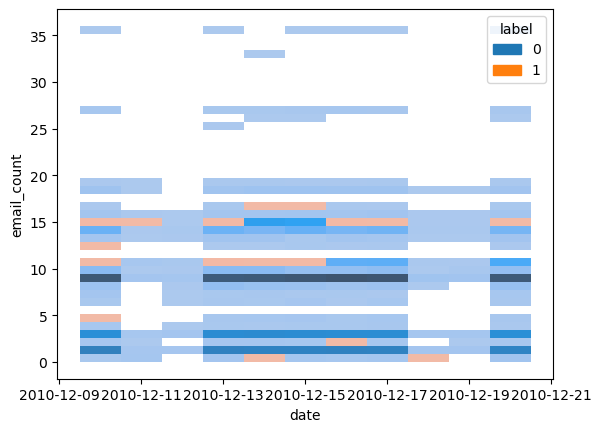

In [167]:
sb.histplot(x = 'date', y="email_count", data = final, hue = "label")

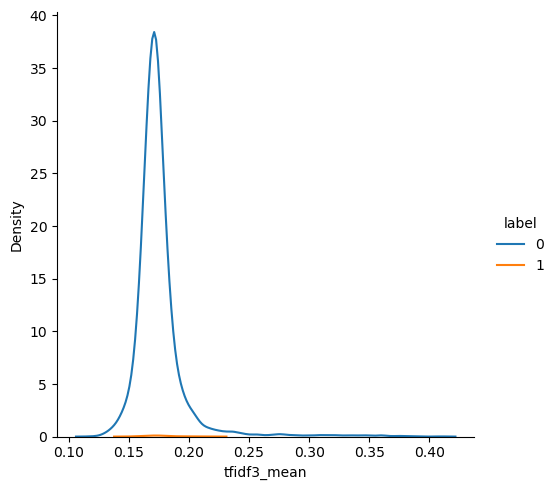

In [148]:
#sb.histplot(data=temp3['tfidf3_mean'])
sb.displot(data=temp3, x="tfidf3_mean", hue="label", kind="kde")

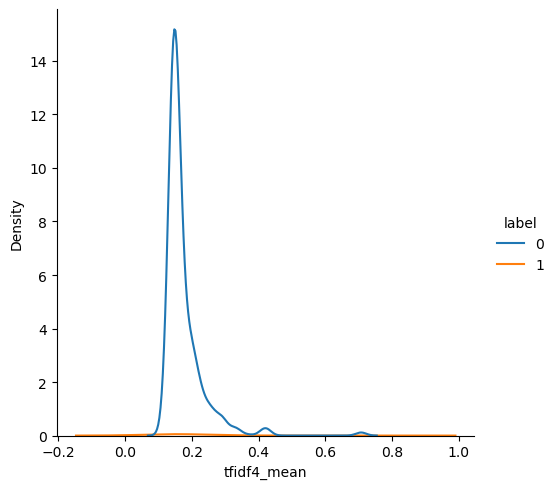

In [150]:
#sb.histplot(data=temp4['tfidf4_mean'])
sb.displot(data=temp4, x="tfidf4_mean", hue="label", kind='kde')

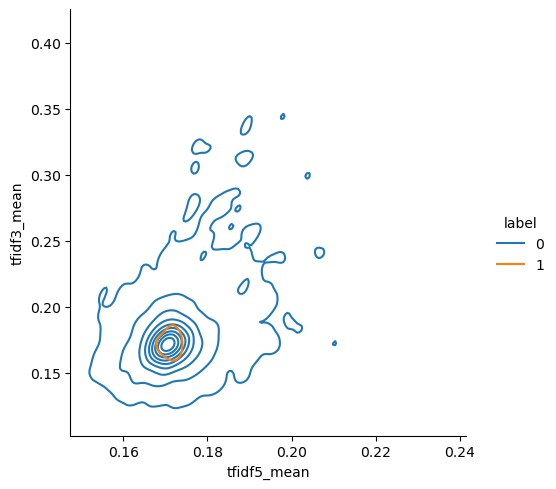

In [157]:
#sb.histplot(data=temp5['tfidf5_mean'])
sb.displot(data=temp3, x="tfidf5_mean", y='tfidf3_mean', hue="label", kind='kde')

In [203]:
#df_person = final.loc[(final['username'] == 'JJM0203')]

In [201]:
#df_badusers = final.loc[(final['label'] == 1)]

In [ ]:
#df_badusers

In [205]:
# X = df_person[['login_count', 'logout_count', 'email_count', 'file_count', 'http_count']].copy()
# y = df_person['label']

In [25]:
X = final[['login_count', 'logout_count', 'email_count', 'file_count', 'http_count']].copy()
y = final['label']

In [206]:
#X = np.array(X).reshape(len(X), 1)

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y)

classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_train,y_train)

predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))


Logistic Regression Accuracy: 0.9965710160620826
Logistic Regression Recall: 0.0


In [64]:
cf_matrix = metrics.confusion_matrix(y_test,predicted)

<Axes: >

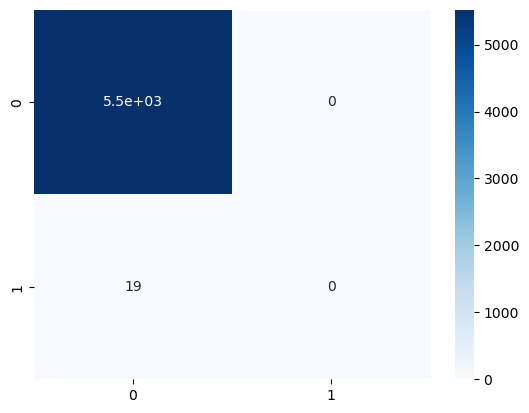

In [65]:

sb.heatmap(cf_matrix, annot=True, cmap='Blues')

In [66]:
undersample = RandomUnderSampler(sampling_strategy=0.5)
X_under, y_under = undersample.fit_resample(X_train, y_train)

In [67]:
classifier = LogisticRegression(max_iter=1000)

classifier.fit(X_under,y_under)

predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))

Logistic Regression Accuracy: 0.8900920411478073
Logistic Regression Recall: 0.5263157894736842


In [68]:
metrics.confusion_matrix(y_test,predicted)

array([[4922,  600],
       [   9,   10]])

In [69]:
X_under['label'] = y_under

<Axes: xlabel='label', ylabel='count'>

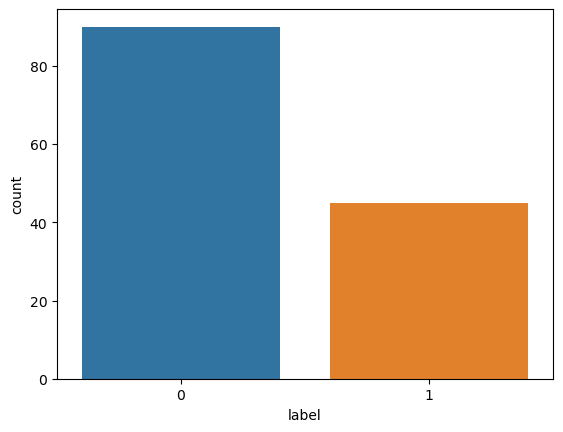

In [70]:
sb.countplot(data=X_under, x='label')

In [71]:
cf_matrix = metrics.confusion_matrix(y_test,predicted)

<Axes: >

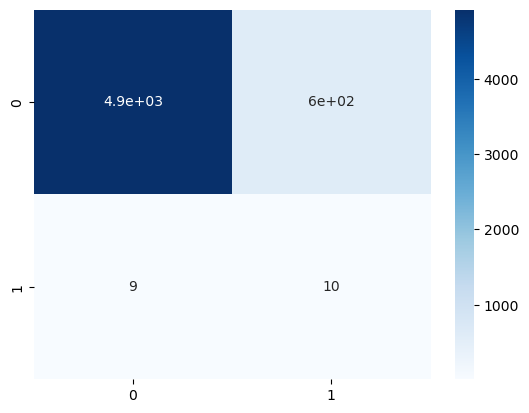

In [78]:
sb.heatmap(cf_matrix, annot=True, cmap='Blues')

**# Word2Vec Section**

In [9]:
import gensim
from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

In [10]:
import gensim.downloader as api
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [11]:
wv = api.load('glove-wiki-gigaword-50')

In [12]:
def field_vec(field):
    vector_size = wv.vector_size
    wv_res = np.zeros(vector_size)
    count = 1
    for w in field:
        if w in wv:
            count += 1
            wv_res += wv[w]
    wv_res = wv_res/count
    return wv_res

In [13]:
df3_bs['w2v_mean'] = df3_bs['df3tokenized'].apply(field_vec)
df4_bs['w2v_mean'] = df4_bs['df4tokenized'].apply(field_vec)
df5_bs['w2v_mean'] = df5_bs['df5tokenized'].apply(field_vec)

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_15597/2480739573.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_bs['w2v_mean'] = df3_bs['df3tokenized'].apply(field_vec)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_15597/2480739573.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_bs['w2v_mean'] = df4_bs['df4tokenized'].apply(field_vec)
/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_15597/2480739573.py:3: SettingWithCopyWarning: 
A value is trying to be set

In [35]:
df_merged.dropna(subset = ['w2v_mean'], inplace=True)

In [ ]:
X = df_merged['tfidf4_mean'].to_list()
y = df_merged['label'].to_list()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,stratify=y)

classifier = LogisticRegression(max_iter=3)

classifier.fit(X_train,y_train)

predicted = classifier.predict(X_test)
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
#print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))



/opt/anaconda3/envs/Praxis/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.9997954540205931
Logistic Regression Recall: 0.0


**# RUU Data Loading and Labeling**

In [33]:
ruu_norm_df = pd.read_csv('/Users/ken.clements/Desktop/normal.csv')

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_93555/1883589292.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ruu_norm_df = pd.read_csv('/Users/ken.clements/Desktop/normal.csv')


In [34]:
ruu_imposter_df = pd.read_csv('/Users/ken.clements/Desktop/imposter.csv')

/var/folders/p4/svf85_b50jvfz4dvm3yf5h0c0000gq/T/ipykernel_93555/3017256222.py:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  ruu_imposter_df = pd.read_csv('/Users/ken.clements/Desktop/imposter.csv')


In [35]:
ruu_norm_df['label'] = 'normal'

In [36]:
ruu_imposter_df['label'] = 'imposter'

In [37]:
ruu_df = pd.concat([ruu_norm_df, ruu_imposter_df])

In [38]:
ruu_df = ruu_df[ruu_df['date'] != 'date']

In [39]:
ruu_df['date'] = pd.to_datetime(ruu_df['date'])
ruu_df['day_date'] = pd.to_datetime(ruu_df['date']).dt.date

In [40]:
ruu_df = ruu_df.sort_values('date')

In [41]:
ruu_df.reset_index()

,index,id,monitor,action,details,uid,date,label,day_date
0,23446337,1,touch,TouchNew,7100 ActiveAuthDataCollection active authentic...,S-1-5-21-842925246-651377827-839522115-168583,2015-01-20 12:57:18,normal,2015-01-20
1,24173650,1,touch,TouchNew,7100 ActiveAuthDataCollection active authentic...,S-1-5-21-842925246-651377827-839522115-168583,2015-01-20 12:57:18,normal,2015-01-20
2,24173656,7,proc,delete,7284 AGMSplash,S-1-5-21-842925246-651377827-839522115-168583,2015-01-20 12:57:19,normal,2015-01-20
3,24173659,10,port,open,127.0.0.1:27017 127.0.0.1:49176 Established,S-1-5-21-842925246-651377827-839522115-168583,2015-01-20 12:57:19,normal,2015-01-20
4,24173657,8,proc,delete,7960 APSDaemon,S-1-5-21-842925246-651377827-839522115-168583,2015-01-20 12:57:19,normal,2015-01-20
...,...,...,...,...,...,...,...,...,...
96511084,346695,815,file,rename,c:\ProgramData\McAfee\Common Framework\Task,S-1-5-21-842925246-651377827-839522115-133600,2015-03-12 14:30:54,imposter,2015-03-12
96511085,346696,816,port,close,134.240.47.52:49211 134.240.6.41:135,S-1-5-21-842925246-651377827-839522115-133600,2015-03-12 14:30:55,imposter,2015-03-12
96511086,346697,817,file,create,c:\ProgramData\McAfee\Common Framework\Task\26...,S-1-5-21-842925246-651377827-839522115-133600,2015-03-12 14:30:56,imposter,2015-03-12
96511087,346698,818,file,touch,c:\ProgramData\McAfee\Common Framework\UpdateH...,S-1-5-21-842925246-651377827-839522115-133600,2015-03-12 14:30:56,imposter,2015-03-12


In [42]:
ruu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96511089 entries, 23446337 to 346699
Data columns (total 8 columns):
 #   Column    Dtype         
---  ------    -----         
 0   id        object        
 1   monitor   object        
 2   action    object        
 3   details   object        
 4   uid       object        
 5   date      datetime64[ns]
 6   label     object        
 7   day_date  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.5+ GB


In [ ]:
#sb.countplot(x = 'date', data = ruu_df.loc[(ruu_df['label'] == 'imposter')], hue = "label")

In [ ]:
#sb.countplot(x = 'date', data = ruu_df, hue = "label")